In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [32]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/Cifar/cifar-10-batches-py.tar.gz' '/content/cifar-10-batches-py.tar.gz'

In [0]:
!cp '/content/cifar-10-batches-py.tar.gz' ~/.keras/datasets/

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

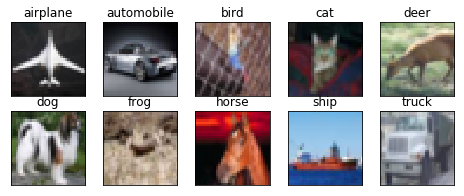

In [35]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0623 18:12:54.147727 140701495228288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0623 18:12:54.189404 140701495228288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 18:12:54.195485 140701495228288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0623 18:13:22.847624 140701495228288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 16s 41ms/step - loss: 1.8689 - acc: 0.2859 - val_loss: 1.4177 - val_acc: 0.4730
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3490 - acc: 0.5104 - val_loss: 1.1257 - val_acc: 0.5988
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1257 - acc: 0.6008 - val_loss: 1.0042 - val_acc: 0.6390
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9840 - acc: 0.6579 - val_loss: 0.9463 - val_acc: 0.6722
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8784 - acc: 0.6951 - val_loss: 0.8240 - val_acc: 0.7139
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8073 - acc: 0.7242 - val_loss: 0.8255 - val_acc: 0.7219
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7484 - acc: 0.7437 - val_loss: 0.7001 - val_acc: 0.7626
Epoch 8/100
390/390 [==============================] - 9s 23m

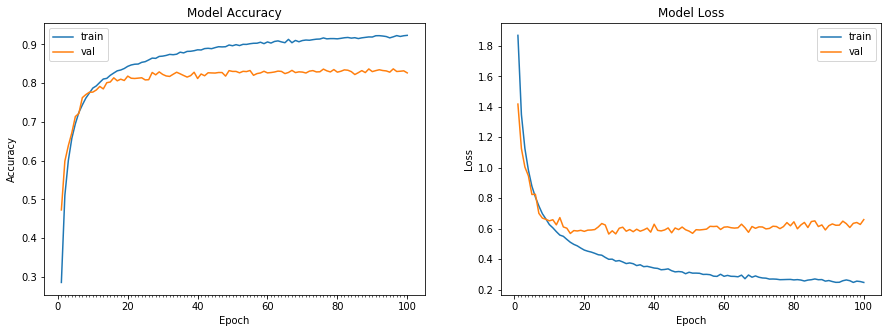

Accuracy on test data is: 82.65


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Save the weights
model.save_weights('/content/drive/My Drive/Cifar/My_6A_1_Checkpoint')

In [0]:
# Restore the weights
model.load_weights('/content/drive/My Drive/Cifar/My_6A_1_Checkpoint')

In [0]:
loss,acc = model.evaluate(test_features, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 1s 114us/step
Restored model, accuracy: 82.65%


In [0]:
from keras.layers import BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.layers import SpatialDropout2D

In [0]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #03
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))


model.add(Convolution2D(64, 3, 3, border_mode='same'))                          #05
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(128, 3, 3, border_mode='same'))                         #07
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(MaxPooling2D(pool_size=(2, 2)))                                       #14
model.add(Convolution2D(32,1,1))                                                #14
model.add(Activation('relu'))


model.add(Convolution2D(64, 3, 3, border_mode='same'))                           #17
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(86, 3, 3, border_mode='same'))                           #20
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(128, 3, 3, border_mode='same'))                          #20
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(MaxPooling2D(pool_size=(2, 2)))                                       #40
model.add(Convolution2D(32,1,1, border_mode='same'))                            #40
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3, border_mode='same'))                           #43
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(86, 3, 3, border_mode='same'))                           #46
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SpatialDropout2D(0.10))

model.add(Convolution2D(10, 3, 3, border_mode='same'))                           #17
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWa

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_58 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_59 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 64)        256       
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 28s 73ms/step - loss: 1.5167 - acc: 0.4745 - val_loss: 1.2114 - val_acc: 0.5765
Epoch 2/100
390/390 [==============================] - 25s 65ms/step - loss: 1.1111 - acc: 0.6316 - val_loss: 1.1146 - val_acc: 0.6199
Epoch 3/100
390/390 [==============================] - 25s 65ms/step - loss: 0.9379 - acc: 0.6890 - val_loss: 0.8198 - val_acc: 0.7252
Epoch 4/100
390/390 [==============================] - 25s 65ms/step - loss: 0.8181 - acc: 0.7332 - val_loss: 0.7627 - val_acc: 0.7391
Epoch 5/100
390/390 [==============================] - 25s 65ms/step - loss: 0.7321 - acc: 0.7596 - val_loss: 0.6178 - val_acc: 0.7948
Epoch 6/100
390/390 [==============================] - 25s 65ms/step - loss: 0.6704 - acc: 0.7801 - val_loss: 0.6808 - val_acc: 0.7741
Epoch 7/100
390/390 [==============================] - 25s 65ms/step - loss: 0.6186 - acc: 0.7977 - val_loss: 0.6518 - val_acc: 0.7780
Epoch 8/100
390/390 [==============================] - 

KeyboardInterrupt: ignored

In [0]:
# Save the weights
model.save_weights('/content/drive/My Drive/Cifar/My_6A_2_Checkpoint')

In [0]:
# Restore the weights
model.load_weights('/content/drive/My Drive/Cifar/My_6A_2_Checkpoint')

In [40]:
loss,acc = model.evaluate(test_features, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 2s 205us/step
Restored model, accuracy: 86.64%
